# Dataset:Income Dataset

###### Description:
This dataset is uploaded on kaggle under the name of "Income dataset" since its goal was to predict the income >50K or <=50k.It's mainly a dataset containing data that revolves around the customers of a bank,its columns are:
* age
* workclass
* fnlwgt        
* education        
* educational-num  
* marital-status   
*  occupation      
* relationship     
*  race             
* gender           
* capital-gain     
* capital-loss     
* hours-per-week   
* native-country   
* income
###### Goal:
prediction of the hours of earn per week  using two diff models:LinearRegression and RandomForest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv(r"C:\Users\user\Downloads\adult.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [3]:
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### First Step: Data Cleaning

We start by checking the duplicated rows and dropping it.

In [4]:
df1.duplicated().sum()

52

In [5]:
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

Now we check the values of each column to see wether there are false values specifically the ones whose type is object so let's specify them.

In [6]:
columnsobj=df1.select_dtypes('object').columns
columnsobj

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [7]:
df1['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [8]:
df1['education'].value_counts()

HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64

In [9]:
df1['marital-status'].value_counts()

Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [10]:
df1['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [11]:
df1['relationship'].value_counts()

Husband           19703
Not-in-family     12557
Own-child          7569
Unmarried          5124
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [12]:
df1['race'].value_counts()

White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [13]:
df1['gender'].value_counts()

Male      32614
Female    16176
Name: gender, dtype: int64

In [14]:
df1['income'].value_counts()

<=50K    37109
>50K     11681
Name: income, dtype: int64

In [15]:
df1['native-country'].value_counts()

United-States                 43792
Mexico                          943
?                               856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

The columns with unexpected responses(to be specific a symbol"?"):
* native-country
* occupation
* workclass

In [16]:
df1=df1.replace('?',np.nan)

Now for the null values,we check its sum and we proceed to dropping the lines where we have null values since its going to cause us some errors later in the machine learning part and even the data visualization .

In [17]:
df1.isna().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [18]:
df1=df1.dropna()
df1.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Second Step :Data visualization

* Basic Visualizations:

Text(0, 0.5, 'Number of Customers')

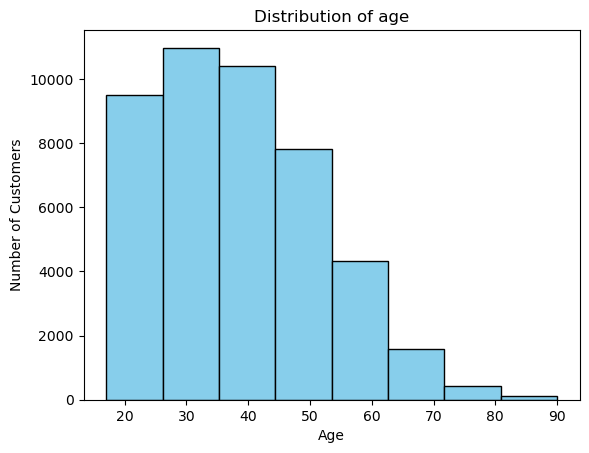

In [19]:
plt.hist(df1["age"], bins=8, color='skyblue', edgecolor='black')
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

We observe that basically most of the customers are aged between 25 and 45

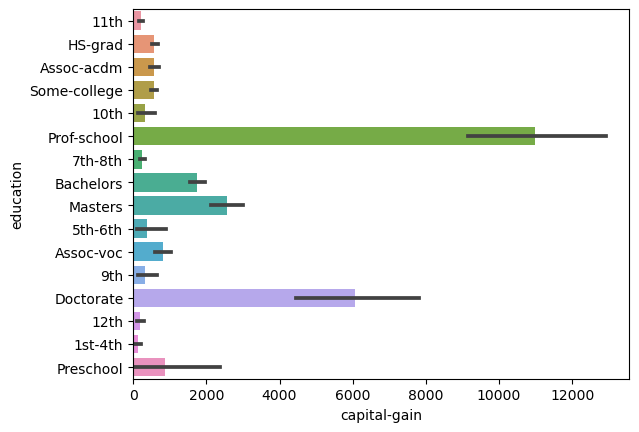

In [20]:
sns.barplot(data=df1, x='capital-gain', y="education");

It is obvious to conclude that the customers who got into prof-school have the highest capital-gain

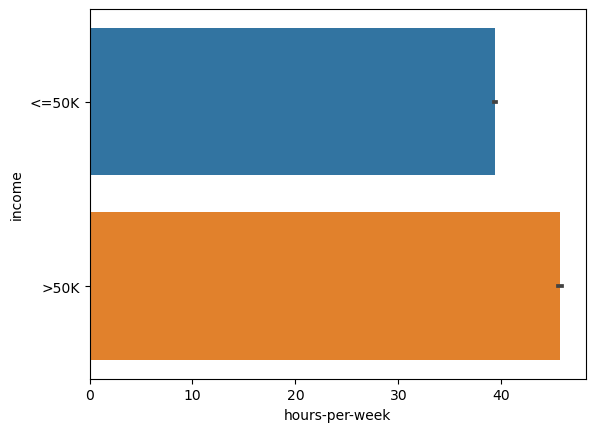

In [21]:
sns.barplot(data=df1, x='hours-per-week', y="income");

The customers whose income>50K their hours of earn per week are more than 40 h => it's normal to find that the higher the hours of earn the higher the income

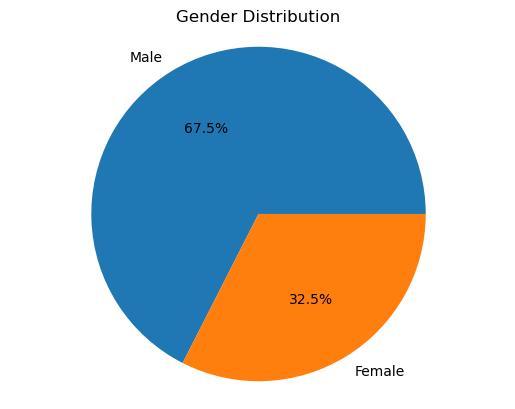

In [22]:
gender_counts = df1['gender'].value_counts()
sizes = gender_counts.values.astype(int)
labels = gender_counts.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Gender Distribution')
plt.show()

Previously while cleaning the data we found that the top 1 occupation is:
* Prof-specialty ==>its valuecounts = 6165

In [23]:
df1occ1=df1[df1['occupation']=='Prof-specialty']

Let's see the dominant education levels and relationship status for this occupation

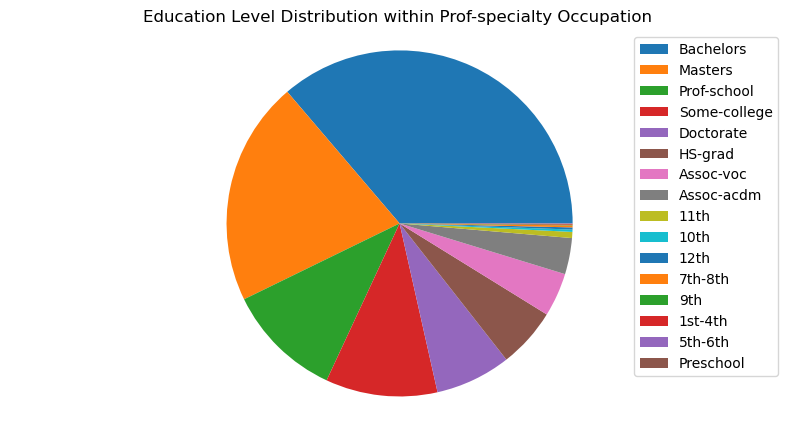

In [24]:
plt.figure(figsize=(10, 5))
education_counts = df1occ1['education'].value_counts()
sizes = education_counts.values
labels = education_counts.index
plt.pie(sizes, labels=[''] * len(labels))
plt.axis('equal')
plt.title('Education Level Distribution within Prof-specialty Occupation')
plt.legend(labels)


we conclude that almost 50% of the customers who work as professors have bachelor degrees

Text(0, 0.5, 'Number of Customers')

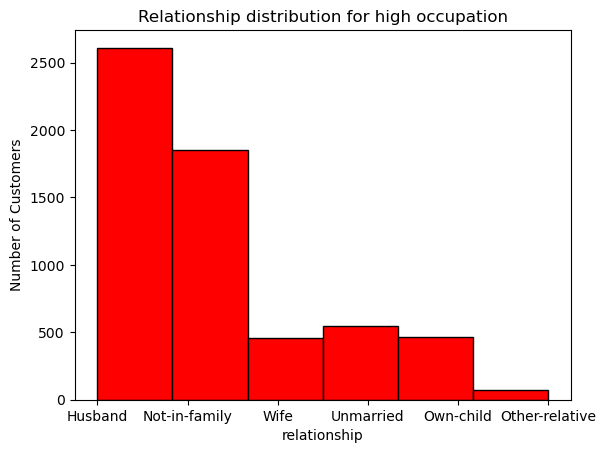

In [25]:
plt.hist(df1occ1["relationship"], bins=6, color='red', edgecolor='black')
plt.title('Relationship distribution for high occupation')
plt.xlabel('relationship')
plt.ylabel('Number of Customers')

We conclude that most of the customers who are professors are husbands

* Statistical visualization:

we start by "boxplotting" the age of the customers with the top 1 occupation

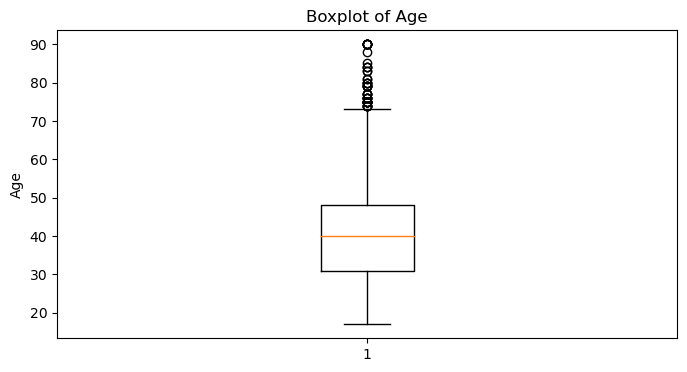

In [26]:
plt.figure(figsize=(8, 4))
plt.boxplot(df1occ1['age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

We can easily conclude that the max is between 80,70 the min is below 20 and the median is basically forty
==> 
* 25% between 20 and 34/32
* 50% is between 20 and 40
* 75% is between 20 and 49


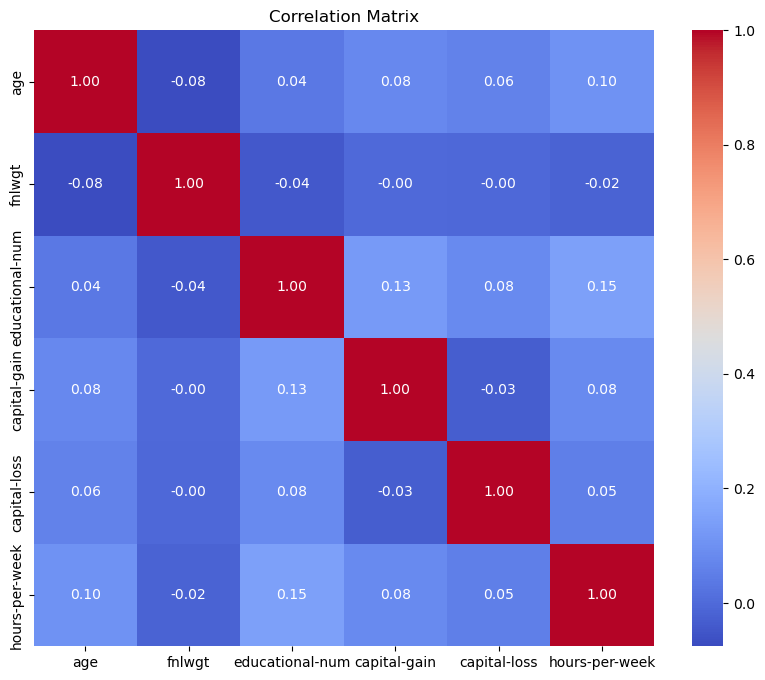

In [27]:
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


 Positive correlations are represented in warmer colors (the red color), while negative correlations are represented in cooler colors (the blue color).

some observations:
* for age  and hours of earn per week:the correlation is negative,itsuggests that this relationship is very weak. There's very little linear association between age and capital gain. ==> As age increases, capital gain tends to decrease.
* for educational num and capitalgain:the correlation is slightly positive This means that as education level increases (higher "education num" values), capital gain also tends to increase.
==>Basically,There is no warm colors in the matrix so the correlations are weak (all of them)

### Third step:Machine Learning=>Predicting the hours of work per week

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.preprocessing import OneHotEncoder,StandardScaler , LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import set_config

In [29]:
import warnings
warnings.filterwarnings('ignore')

* preprocessing:

In [30]:
df1.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

We already handled the missing values in the data cleaning part so we will not need an imputer.

=>this line was added to fix an error that I faced later,the fnlwgt messed the data and it had to be deleted since it had nothing to do with the the column to be predicted.

In [31]:
df1.drop('fnlwgt',axis=1)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Now we move to encoding the categorical columns:each category is gonna be transformed into a number

In [32]:
df1_encoded = pd.get_dummies(df1, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])

In [33]:
df1_encoded['income'] = df1_encoded['income'].replace({'<=50K':0, '>50K':1})

Now we move to standarizing or scalling the numerical columns

In [34]:
numerical_cols = ['age', 'educational-num', 'capital-gain', 'capital-loss']
scaler = StandardScaler()
df1_encoded[numerical_cols] = scaler.fit_transform(df1_encoded[numerical_cols])

In [35]:
X = df1_encoded.drop(columns=['hours-per-week'])
y = df1_encoded['hours-per-week']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape (X):", X_train.shape)
print("Testing set shape (X):", X_test.shape)

Training set shape (X): (36140, 104)
Testing set shape (X): (9035, 104)


=> 80% for the training and 20% for the testing part (for both Y and X)

Now we move to implementing a machine learning model,we chose the linearRegression model for these next reasons:

#### Model 1:LinearRegression

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Now that we trained a model and made predictions on the testing data we move to calculating the margin of errors

In [38]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 7.427182200686948
Mean Squared Error (MSE): 115.60471770101036
Root Mean Squared Error (RMSE): 10.75196343469463


* Prediction:

In [39]:
input_data = {
    'age': 35,
    'workclass': 'Private',
    'education': 'Bachelors',
    'marital-status': 'Married-civ-spouse',
    'occupation': 'Prof-specialty',
    'relationship': 'Husband',
    'race': 'White',
    'gender': 'Male',
    'capital-gain': 0,
    'capital-loss': 0,
    'native-country': 'United-States'
}
input_df = pd.DataFrame([input_data])

# applying changes to the input_df
input_df_encoded = pd.get_dummies(input_df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])
missing_cols = set(df1_encoded.columns) - set(input_df_encoded.columns)
for col in missing_cols:
    input_df_encoded[col] = 0
input_df_encoded = input_df_encoded[df1_encoded.columns]

# Scaling numerical columns
numerical_cols = ['age', 'educational-num', 'capital-gain', 'capital-loss']
input_df_scaled = input_df_encoded.copy()
input_df_scaled[numerical_cols] = scaler.transform(input_df_scaled[numerical_cols])
input_df_scaled.drop(columns=['hours-per-week'], inplace=True)

In [40]:
predictions = model.predict(input_df_scaled)
print("Predicted hours-per-week:", predictions[0])

Predicted hours-per-week: 38.117879468645604


#### Model 2:RandomForest

In [41]:
anothermodel = RandomForestRegressor(n_estimators=100, random_state=42)

In [42]:
anothermodel.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
rfPredictions = anothermodel.predict(X_test)

In [44]:
predictions1 = model.predict(input_df_scaled)
print("Predicted hours-per-week:", predictions[0])

Predicted hours-per-week: 38.117879468645604


Calculating the metrics (MAE,MSE,RMSE) of RandomForest

In [45]:
rfMae = mean_absolute_error(y_test, rfPredictions)
rfMse = mean_squared_error(y_test, rfPredictions)
rfRmse = np.sqrt(rfMse)

print("Mean Absolute Error (MAE):", rfMae)
print("Mean Squared Error (MSE):", rfMse)
print("Root Mean Squared Error (RMSE):", rfRmse)

Mean Absolute Error (MAE): 7.326952336153055
Mean Squared Error (MSE): 112.46951667819948
Root Mean Squared Error (RMSE): 10.60516462287123


### ==> Comparison between model 1 and model 2:
* MAE Comparison:
both linearRegression and RandomForest have low MAE which indicates that their predictions are close to the actual hours-per-week value=> the Random Forest model has a lower MSE compared to Linear Regression (112.4695 X 115.6047)
* MSE Comparison:
Same observations as the MAE we also can conclude that the actual hours-per-week value is small
* RMSE Comparison:
the RMSE is basically the magnitude of errors made by each model and since the RMSE of the Random Forest model is lower we suggest that its predictions have slightly lower variability compared to Linear Regression.